In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import math
import numpy as np
from scipy import stats

In [2]:
df1 = pd.read_csv('deliveries.csv')
df2 = pd.read_csv('matches.csv')

In [3]:
 df1.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [5]:
df1.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [6]:
df2.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [8]:
df2.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [9]:
win_by_wickets_data = df2[df2.win_by_wickets > 0].win_by_wickets
win_by_wickets_data

1       7
2      10
3       6
5       9
6       4
7       8
9       4
10      8
11      4
12      7
15      6
17      4
21      8
22      4
24      6
28      7
29      7
30      7
34     10
36      5
37      5
38      6
39      4
40      7
44      6
45      6
46      7
48      2
51      8
53      9
       ..
586     7
587     7
588     6
589     6
590    10
593     5
594     6
595     2
599     6
600     3
604     8
605     5
606     8
608     7
609     5
610     7
613     5
616     6
617     7
618     7
620     8
621     7
623     9
626     6
627     6
628     4
629     6
631     6
632     4
634     4
Name: win_by_wickets, Length: 339, dtype: int64

In [10]:
 # Cumulative relative frequency graph :
win_by_wickets_freq = win_by_wickets_data.value_counts(sort=False)
print(win_by_wickets_freq)

1      1
2      4
3     15
4     34
5     57
6     68
7     70
8     48
9     32
10    10
Name: win_by_wickets, dtype: int64


Text(0, 0.5, 'Frequency')

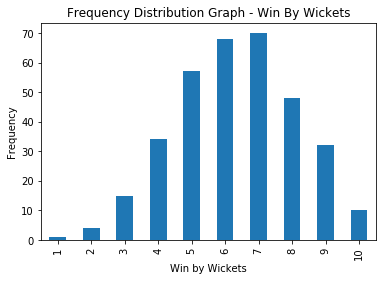

In [11]:
plot = win_by_wickets_freq.plot.bar()
plot.set_title("Frequency Distribution Graph - Win By Wickets")
plot.set_xlabel("Win by Wickets")
plot.set_ylabel("Frequency")

In [12]:
win_by_wickets_rel_freq = win_by_wickets_data.value_counts(sort = False, normalize=True)print(win_by_wickets_rel_freq)


1     0.002950
2     0.011799
3     0.044248
4     0.100295
5     0.168142
6     0.200590
7     0.206490
8     0.141593
9     0.094395
10    0.029499
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative Frequency')

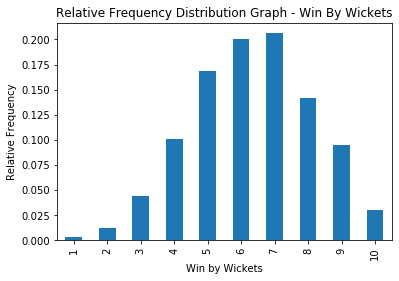

In [13]:
plot2 = win_by_wickets_rel_freq.plot.bar()
plot2.set_title("Relative Frequency Distribution Graph - Win By Wickets")
plot2.set_xlabel("Win by Wickets")
plot2.set_ylabel("Relative Frequency")

In [14]:
# 2. Cumulative relative frequency graph
win_by_wickets_cummu_freq = win_by_wickets_data.value_counts(sort = False, normalize=True).cumsum()
print(win_by_wickets_cummu_freq)

1     0.002950
2     0.014749
3     0.058997
4     0.159292
5     0.327434
6     0.528024
7     0.734513
8     0.876106
9     0.970501
10    1.000000
Name: win_by_wickets, dtype: float64


Text(0, 0.5, 'Relative Frequency')

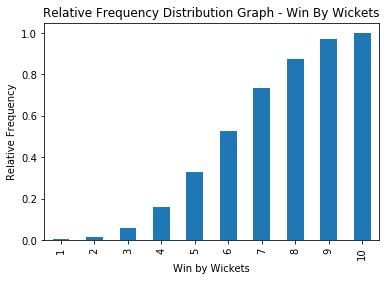

In [15]:
plot3 = win_by_wickets_cummu_freq.plot.bar()
plot3.set_title("Relative Frequency Distribution Graph - Win By Wickets")
plot3.set_xlabel("Win by Wickets")
plot3.set_ylabel("Relative Frequency")

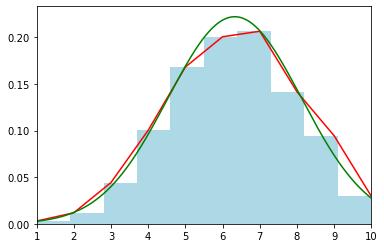

In [16]:
 # 4.Bell curve or Gaussian distribution
win_by_wickets_mean, win_by_wickets_std = win_by_wickets_data.mean(),win_by_wickets_data.std()
win_by_wickets_data.hist(color='lightblue',weights=np.zeros_like(win_by_wickets_data)+1.0/win_by_wickets_data.count())
win_by_wickets_data.value_counts(sort=False,normalize=True).plot.line(color='red')
random_data = np.arange(1,10,0.001)
pyplot.plot(random_data,stats.norm.pdf(random_data,win_by_wickets_mean,win_by_wickets_std),color='green')

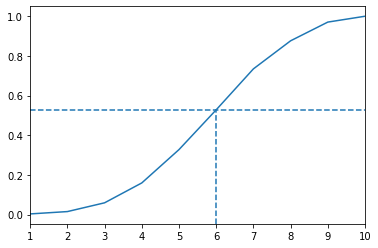

In [17]:
plt = win_by_wickets_cummu_freq.plot.line()
plt.axhline(y = win_by_wickets_cummu_freq[6],xmax = 5.510,linestyle='dashed')
plt.axvline(x=6,ymax=win_by_wickets_cummu_freq[6],linestyle='dashed')

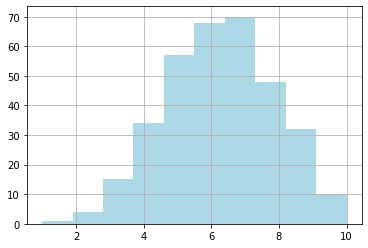

In [18]:
win_by_wickets_mean = win_by_wickets_data.mean()
win_by_wickets_mean
win_by_wickets_std = win_by_wickets_data.std()
win_by_wickets_std
win_by_wickets_data.hist(color="lightblue")

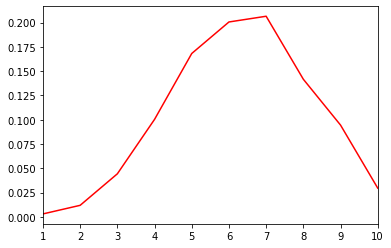

In [19]:
win_by_wickets_data.value_counts(sort=False, normalize=True).plot.line(
color="red")